In [61]:
import sys
import os
cwd = os.getcwd()
sloth_path=f'{cwd}/../'
sys.path.append(sloth_path)

# ex_coordTrafo.ipynb

Below is a short example of how to use `coordTrafo.py` to transform between 'normal' geographic coordinates and pole-rotated coordinates.    

Especially in the field of TSMP, both coordinates play an important role and you may need to transform between them. Also, knowing how to do this might help you to understand rotated coordinates a bit better.

We start with importing needed libraries for the following example

In [37]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sloth.coordTrafo
import cartopy
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
%matplotlib inline 

The degree of rotation is defined by the rotated north pole. The rotated north pole thereby defined the rotated system and is used as an anchor for the rotated coordinates. The position of the rotated north pole thereby is given in 'real' geographic coordinates.   

So lets define a rotated north pole with the coordinates `39.25°N 162.0°E`:

In [24]:
np_lon = -162.0
print(f'np_lon {np_lon}')
np_lat = 39.25
print(f'np_lat {np_lat}')

np_lon -162.0
np_lat 39.25


Next we define an 1D example set of coordinates to transform them into the rotated coordinate system and directly apply the inverse function to unrotaed them again, checking if both functions are working:

In [25]:
print(f'Original defined coordinates:')
lon1D = np.linspace(-10,15,5)
print(f'lon1D: \n{lon1D}')
lat1D = np.linspace(40,60,5)
print(f'lat1D: \n{lat1D}')
print(f'\n')

print(f'Rotated coordinates:')
r_lat1D, r_lon1D = sloth.coordTrafo.rotate_grid(lat=lat1D, lon=lon1D, np_lat=np_lat, np_lon=np_lon)
print(f'r_lon1D: \n{r_lon1D}')
print(f'r_lat1D: \n{r_lat1D}')
print(f'\n')

print(f'Unrotated coordinates:')
ur_lat1D, ur_lon1D = sloth.coordTrafo.undo_grid_rotation(rlat=r_lat1D, rlon=r_lon1D, np_lat=np_lat, np_lon=np_lon)
print(f'ur_lon1D: \n{ur_lon1D}')
print(f'ur_lat1D: \n{ur_lat1D}')
print(f'\n')

Original defined coordinates:
lon1D: 
[-10.    -3.75   2.5    8.75  15.  ]
lat1D: 
[40. 45. 50. 55. 60.]


Rotated coordinates:
r_lon1D: 
[-21.2308728  -15.21939623  -9.89130934  -5.30708676  -1.51937942]
r_lat1D: 
[-6.72397448 -3.50902255  0.28728646  4.58191866  9.28080529]


Unrotated coordinates:
ur_lon1D: 
[-10.    -3.75   2.5    8.75  15.  ]
ur_lat1D: 
[40. 45. 50. 55. 60.]




The same is working for 2D coordinates as usually used within the realm of TSMP.

In [26]:
print(f'Original defined coordinates:')
lon2D, lat2D = np.meshgrid(lon1D, lat1D)
print(f'lon2D: \n{lon2D}')
print(f'lat2D: \n{lat2D}')
print(f'\n')

print(f'Rotated coordinates:')
r_lat2D, r_lon2D = sloth.coordTrafo.rotate_grid(lat=lat2D, lon=lon2D, np_lat=np_lat, np_lon=np_lon)
print(f'r_lon2D: \n{r_lon2D}')
print(f'r_lat2D: \n{r_lat2D}')
print(f'\n')

print(f'Unrotated coordinates:')
ur_lat2D, ur_lon2D = sloth.coordTrafo.undo_grid_rotation(rlat=r_lat2D, rlon=r_lon2D, np_lat=np_lat, np_lon=np_lon)
print(f'ur_lon2D: \n{ur_lon2D}')
print(f'ur_lat2D: \n{ur_lat2D}')
print(f'\n')

Original defined coordinates:
lon2D: 
[[-10.    -3.75   2.5    8.75  15.  ]
 [-10.    -3.75   2.5    8.75  15.  ]
 [-10.    -3.75   2.5    8.75  15.  ]
 [-10.    -3.75   2.5    8.75  15.  ]
 [-10.    -3.75   2.5    8.75  15.  ]]
lat2D: 
[[40. 40. 40. 40. 40.]
 [45. 45. 45. 45. 45.]
 [50. 50. 50. 50. 50.]
 [55. 55. 55. 55. 55.]
 [60. 60. 60. 60. 60.]]


Rotated coordinates:
r_lon2D: 
[[-21.2308728  -16.67039022 -11.97937688  -7.18958924  -2.33839908]
 [-19.40132599 -15.21939623 -10.92814903  -6.55504057  -2.13140398]
 [-17.58250999 -13.78323126  -9.89130934  -5.93070528  -1.92799404]
 [-15.75024855 -12.34167772  -8.85357948  -5.30708676  -1.72502489]
 [-13.87969946 -10.8742262   -7.79962959  -4.67473176  -1.51937942]]
r_lat2D: 
[[ -6.72397448  -8.29631142  -9.49426733 -10.30045517 -10.70259096]
 [ -2.0684089   -3.50902255  -4.60425148  -5.34010602  -5.70678733]
 [  2.58925133   1.2804881    0.28728646  -0.37911616  -0.71091099]
 [  7.24428687   6.06919153   5.17873024   4.58191866   4.2

We can plot the 2D rotated and unrotated coordinates to visualise what is happening here. Note that we use rotated coordinates to avoid meridian convergence, and note that the rotated coordinates are along the equator, where the effect of meridian convergence is least.

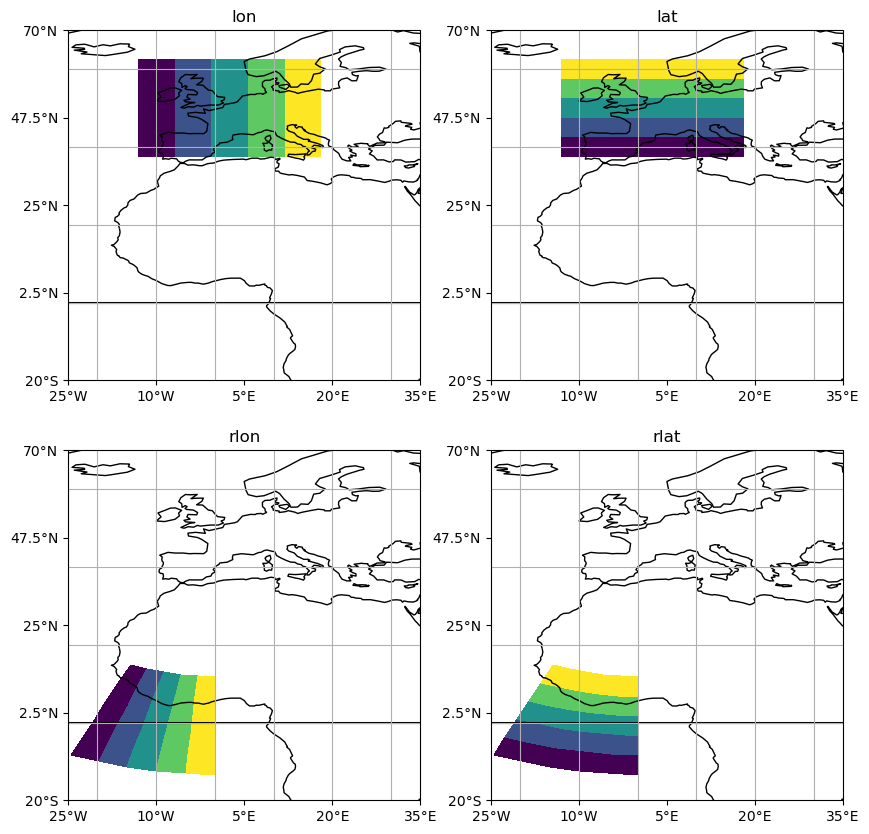

In [48]:
rotated_pole = cartopy.crs.RotatedPole(pole_latitude=np_lat, pole_longitude=np_lon)
data_projection = cartopy.crs.PlateCarree()
plt.figure(figsize=(10,10))
#x = plt.subplot(111, projection=cartopy.crs.PlateCarree())
#ax = plt.subplot(111, projection=rotated_pole)
lon_formatter = LongitudeFormatter(zero_direction_label=True)    
lat_formatter = LatitudeFormatter()
x_extend = [-25, 35]
y_extend = [-20, 70]

subID = [221, 222, 223, 224]
subTitle = ['original lon', 'original lat', 'rotated lon', 'rotated lat']
X = [lon2D, lon2D, r_lon2D, r_lon2D]
Y = [lat2D, lat2D, r_lat2D, r_lat2D]
Z = [lon2D, lat2D, lon2D, lat2D]
plot_sets = zip(X, Y, Z)

for idx, plot_set in enumerate(plot_sets):
    ax = plt.subplot(subID[idx], projection=cartopy.crs.PlateCarree())
    ax.set_extent([x_extend[0], x_extend[1], y_extend[0], y_extend[1]], crs=cartopy.crs.PlateCarree())
    ax.gridlines()
    ax.coastlines()
    ax.pcolormesh(plot_set[0], plot_set[1], plot_set[2])
    ax.set_aspect('auto')
    ax.set_xticks(np.linspace(x_extend[0], x_extend[1], 5), crs=cartopy.crs.PlateCarree())
    ax.set_yticks(np.linspace(y_extend[0], y_extend[1], 5), crs=cartopy.crs.PlateCarree())
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.set_title(f'{subTitle[idx]}')
    ax.axhline(y=0, color='black')


To understand the shape of e.g. the EUR-11 domain plotted in geographic coordinates, we play the other way around and do define the original coordinates in the roteted system and plot the unrotaed ones:

In [52]:
print(f'Original (rotated) coordinates:')
rlon1D = np.linspace(-29,15,5)
rlat1D = np.linspace(-24.,20,5)
rlon2D, rlat2D = np.meshgrid(rlon1D, rlat1D)
print(f'rlon2D: \n{rlon2D}')
print(f'rlat2D: \n{rlat2D}')
print(f'\n')

print(f'Unrotated coordinates:')
urlat2D, urlon2D = sloth.coordTrafo.undo_grid_rotation(rlat=rlat2D, rlon=rlon2D, np_lat=np_lat, np_lon=np_lon)
print(f'urlon2D: \n{urlon2D}')
print(f'urlat2D: \n{urlat2D}')
print(f'\n')

Original (rotated) coordinates:
rlon2D: 
[[-29. -18.  -7.   4.  15.]
 [-29. -18.  -7.   4.  15.]
 [-29. -18.  -7.   4.  15.]
 [-29. -18.  -7.   4.  15.]
 [-29. -18.  -7.   4.  15.]]
rlat2D: 
[[-24. -24. -24. -24. -24.]
 [-13. -13. -13. -13. -13.]
 [ -2.  -2.  -2.  -2.  -2.]
 [  9.   9.   9.   9.   9.]
 [ 20.  20.  20.  20.  20.]]


Unrotated coordinates:
urlon2D: 
[[-10.35936993  -0.08066254  10.85915425  22.08830665  33.14970198]
 [-15.51110126  -3.59916283   9.40995869  22.92243904  36.14130389]
 [-21.871175    -8.17200123   7.46056311  24.04960343  40.07513592]
 [-30.3807953  -14.82252461   4.44120921  25.81094308  45.91597698]
 [-42.74871852 -26.01018472  -1.39654551  29.29334436  56.16698939]]
urlat2D: 
[[21.18614107 24.54915255 26.41216007 26.63948269 25.21352753]
 [31.17221883 35.11974877 37.34356143 37.61693    35.90950874]
 [40.90489431 45.55814849 48.25118256 48.5864432  46.50788476]
 [50.16902087 55.73075487 59.10775048 59.53876457 56.90575668]
 [58.52311664 65.29521618 69.8

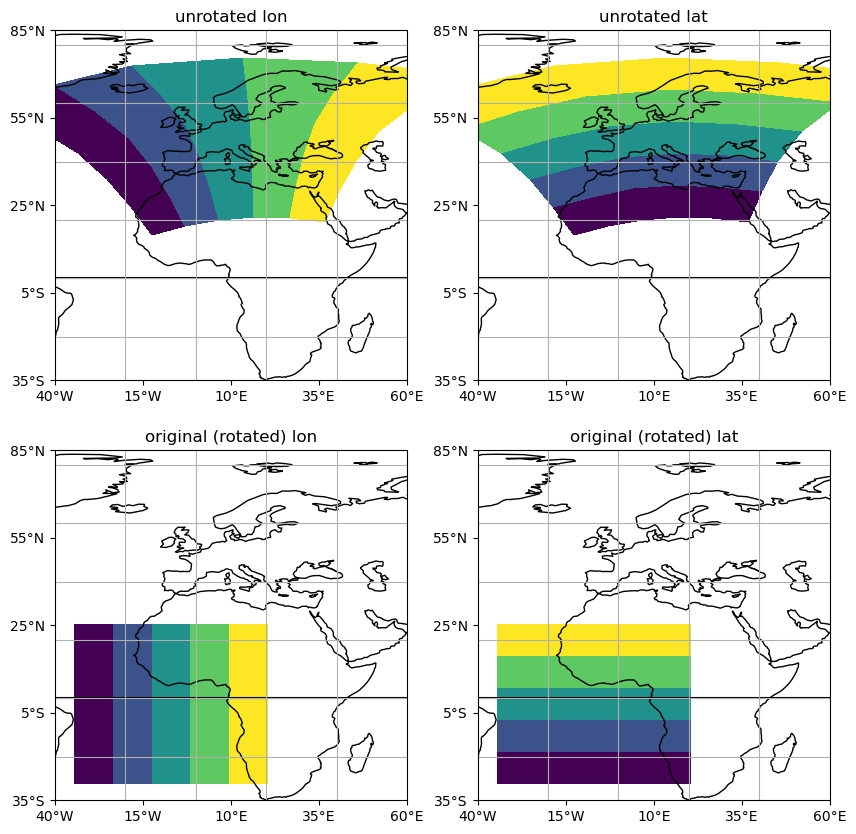

In [59]:
rotated_pole = cartopy.crs.RotatedPole(pole_latitude=np_lat, pole_longitude=np_lon)
data_projection = cartopy.crs.PlateCarree()
plt.figure(figsize=(10,10))
#x = plt.subplot(111, projection=cartopy.crs.PlateCarree())
#ax = plt.subplot(111, projection=rotated_pole)
lon_formatter = LongitudeFormatter(zero_direction_label=True)    
lat_formatter = LatitudeFormatter()
x_extend = [-40, 60]
y_extend = [-35, 85]

subID = [221, 222, 223, 224]
subTitle = ['unrotated lon', 'unrotated lat', 'original (rotated) lon', 'original (rotated) lat']
X = [urlon2D, urlon2D, rlon2D, rlon2D]
Y = [urlat2D, urlat2D, rlat2D, rlat2D]
Z = [rlon2D, rlat2D, rlon2D, rlat2D]
plot_sets = zip(X, Y, Z)

for idx, plot_set in enumerate(plot_sets):
    ax = plt.subplot(subID[idx], projection=cartopy.crs.PlateCarree())
    ax.set_extent([x_extend[0], x_extend[1], y_extend[0], y_extend[1]], crs=cartopy.crs.PlateCarree())
    ax.gridlines()
    ax.coastlines()
    ax.pcolormesh(plot_set[0], plot_set[1], plot_set[2])
    ax.set_aspect('auto')
    ax.set_xticks(np.linspace(x_extend[0], x_extend[1], 5), crs=cartopy.crs.PlateCarree())
    ax.set_yticks(np.linspace(y_extend[0], y_extend[1], 5), crs=cartopy.crs.PlateCarree())
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.set_title(f'{subTitle[idx]}')
    ax.axhline(y=0, color='black')